<font color='black' font size=4> Dataset use "MY2022 Fuel Consumption Ratings.csv" https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
car_df=pd.read_csv('MY2022 Fuel Consumption Ratings.csv')
car_df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [3]:
car_df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [4]:
car_df.Make.unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [5]:
car_df.Make.value_counts()

Ford             89
Chevrolet        80
Porsche          77
BMW              60
GMC              54
Toyota           51
Audi             45
Mercedes-Benz    43
Jeep             34
Hyundai          29
Lexus            28
Cadillac         26
Kia              25
Nissan           23
Honda            23
Mazda            23
Dodge            21
MINI             20
Subaru           19
Volkswagen       18
Land Rover       18
Ram              16
Maserati         13
Volvo            12
Buick             9
Acura             8
Lamborghini       8
Infiniti          8
Genesis           8
Bentley           8
Jaguar            8
Lincoln           7
Mitsubishi        7
Rolls-Royce       7
Alfa Romeo        6
Chrysler          6
Aston Martin      5
Bugatti           3
FIAT              1
Name: Make, dtype: int64

In [6]:
car_df['Model Year'].value_counts()


2022    946
Name: Model Year, dtype: int64

/home/orion/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Density'>

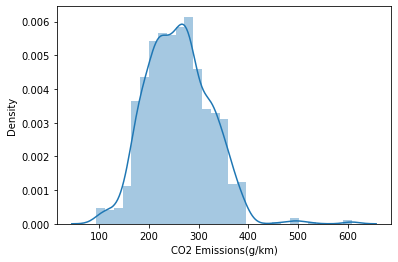

In [7]:
sn.distplot(car_df['CO2 Emissions(g/km)'])

<font size=6 font color="blue"><p>Distribution Plot Engine Size</p></font>
<font size=3 style='bold'><p>As we can see most of the Engine size in between 2-4</p></font>

/home/orion/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Engine Size(L)', ylabel='Density'>

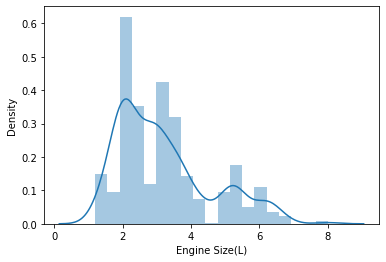

In [8]:
sn.distplot(car_df['Engine Size(L)'])


<font size=6 font color="blue"><p>Distribution Plot Fuel Comsuption (City,highway,Combination of City and Highway</p></font>


/home/orion/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/orion/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/orion/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

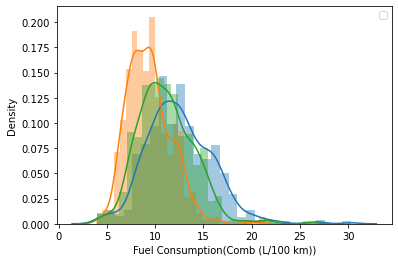

In [7]:
sn.distplot(car_df['Fuel Consumption (City (L/100 km)'])
sn.distplot(car_df['Fuel Consumption(Hwy (L/100 km))'])
sn.distplot(car_df['Fuel Consumption(Comb (L/100 km))'])
plt.legend();

/home/orion/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2 Rating', ylabel='Density'>

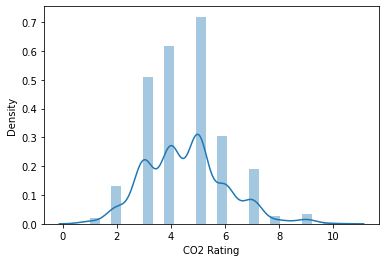

In [10]:
sn.distplot(car_df['CO2 Rating'])   

<AxesSubplot:xlabel='CO2 Rating', ylabel='Count'>

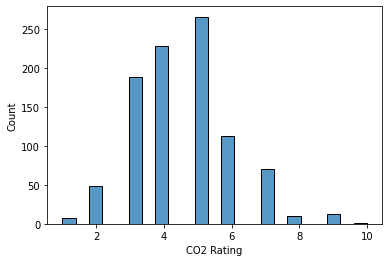

In [11]:
sn.histplot(car_df['CO2 Rating'])

<AxesSubplot:xlabel='Smog Rating', ylabel='Count'>

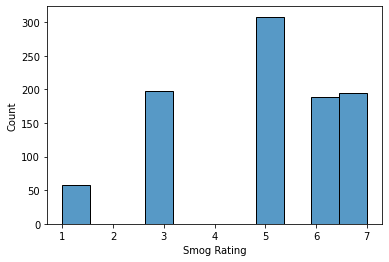

In [12]:
sn.histplot(car_df['Smog Rating'])

/home/orion/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Density'>

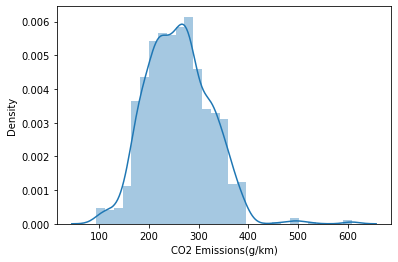

In [13]:
sn.distplot(car_df['CO2 Emissions(g/km)'])

<font size=5 font color='Green'>Scatter plot between CO2 Emissions and CO2 Rating</font>
<p ><font size=3 styl='bold'>As we can see Less CO2 emission higher CO2 rating</p>

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='CO2 Rating'>

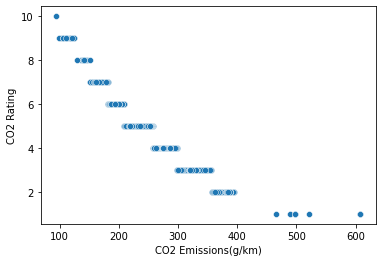

In [14]:
sn.scatterplot(x=car_df['CO2 Emissions(g/km)'],y=car_df['CO2 Rating'])

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Smog Rating'>

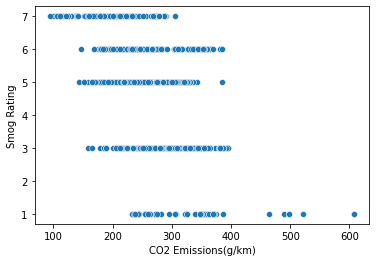

In [15]:
sn.scatterplot(x=car_df['CO2 Emissions(g/km)'],y=car_df['Smog Rating'])

<font color="blue"><h1>Scatter plot Engine size(L) vs Fuel Consumption (City (L/100 km) Fuel consumption in city</h1></font>
<h3>As we can see as engine size  increases Fuel consuption also increase </h3>

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Fuel Consumption (City (L/100 km)'>

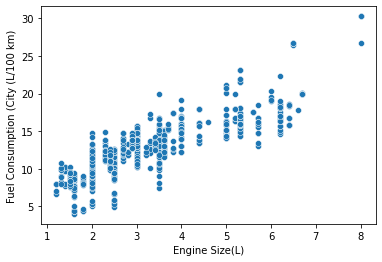

In [16]:
sn.scatterplot(x=car_df['Engine Size(L)'],y=car_df['Fuel Consumption (City (L/100 km)'])

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Fuel Consumption(Hwy (L/100 km))'>

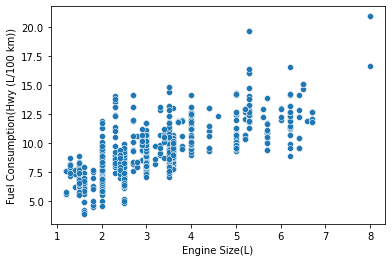

In [17]:
sn.scatterplot(x=car_df['Engine Size(L)'],y=car_df['Fuel Consumption(Hwy (L/100 km))'])

<h1><font color='blue'>Scatter plot Fuel Consumption Vs CO2 emission</font></h1>
<h3> Clear linear  realtionship betweeb Fuel consimption in city and CO2 emissions</h3>

<AxesSubplot:xlabel='Fuel Consumption (City (L/100 km)', ylabel='CO2 Emissions(g/km)'>

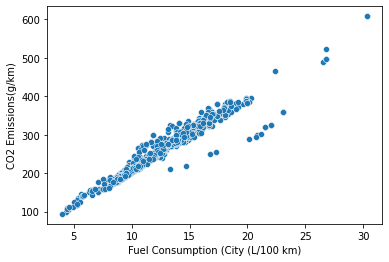

In [18]:
sn.scatterplot(x=car_df['Fuel Consumption (City (L/100 km)'],y=car_df['CO2 Emissions(g/km)'])

<AxesSubplot:xlabel='Fuel Consumption(Hwy (L/100 km))', ylabel='CO2 Emissions(g/km)'>

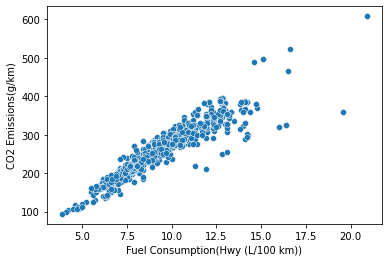

In [19]:
sn.scatterplot(x=car_df['Fuel Consumption(Hwy (L/100 km))'],y=car_df['CO2 Emissions(g/km)'])

In [20]:
car_df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

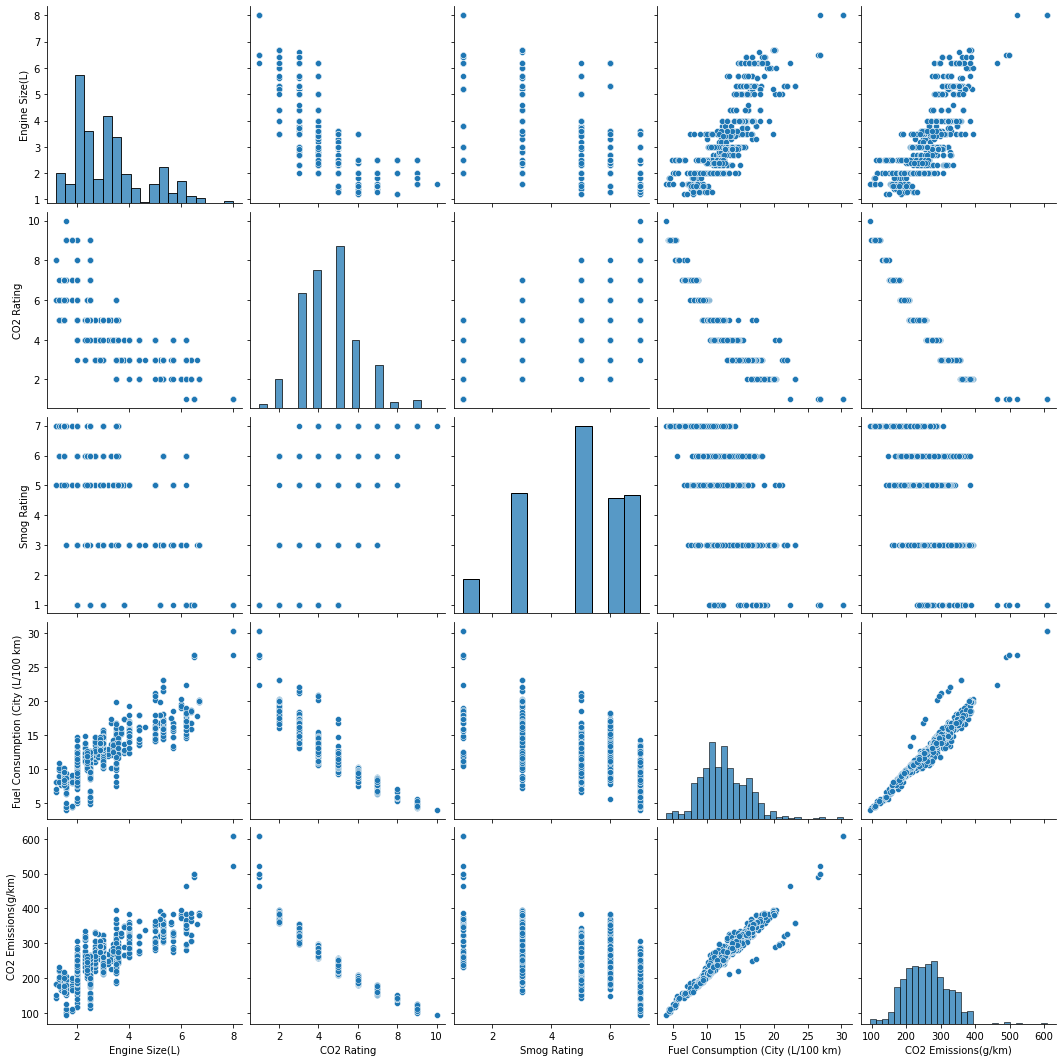

In [21]:
influential_featuers=['Engine Size(L)','CO2 Rating','Smog Rating','Fuel Consumption (City (L/100 km)','CO2 Emissions(g/km)']
sn.pairplot(car_df[influential_featuers],height=3)

In [22]:
co2_emission=car_df.groupby('CO2 Rating')['CO2 Emissions(g/km)'].mean()
print(co2_emission)

CO2 Rating
1     526.857143
2     373.375000
3     326.783069
4     276.789474
5     232.030075
6     194.469027
7     169.577465
8     140.700000
9     112.384615
10     94.000000
Name: CO2 Emissions(g/km), dtype: float64


In [23]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [8]:
car_df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [24]:
car_df['Fuel Type'].value_counts()

Z    458
X    446
D     28
E     14
Name: Fuel Type, dtype: int64

<AxesSubplot:xlabel='Fuel Type', ylabel='Count'>

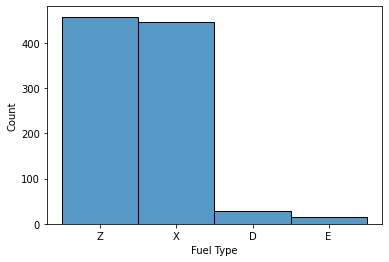

In [25]:
sn.histplot(car_df['Fuel Type'],bins=4,binwidth=3)

## Heat map

### As we can see CO2 emissions and CO2 Rating are negatively correlated
### CO2 Rating and Fuel Consumption are negatively correlated

<AxesSubplot:>

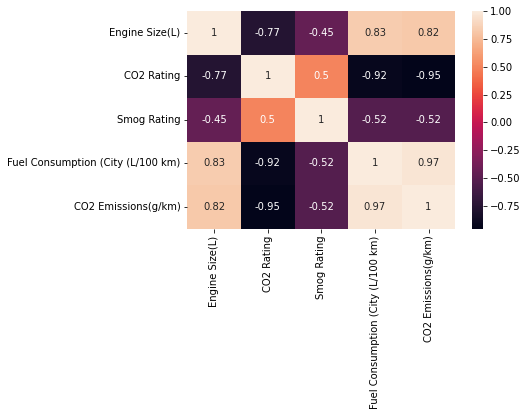

In [26]:
sn.heatmap(car_df[influential_featuers].corr(),annot=True)

In [27]:
car_df['Cylinders'].value_counts()

4     404
6     295
8     197
3      21
12     17
10      8
16      3
5       1
Name: Cylinders, dtype: int64

<AxesSubplot:xlabel='Cylinders', ylabel='Count'>

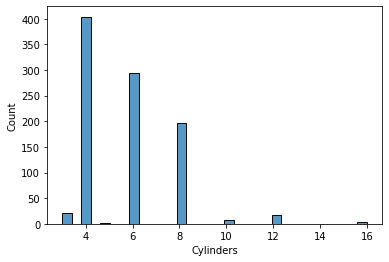

In [28]:
sn.histplot(car_df['Cylinders'])

/home/orion/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Cylinders'>

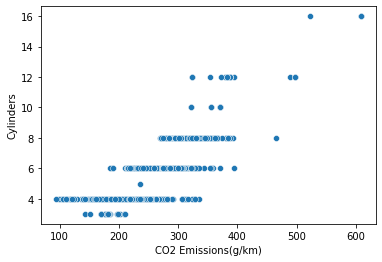

In [29]:
sn.scatterplot(car_df['CO2 Emissions(g/km)'],car_df['Cylinders'])

In [30]:
car_df['Cylinders'].unique()

array([ 4,  6,  8, 12, 10,  5, 16,  3])

In [31]:
car_df['Engine Size(L)'].value_counts()

2.0    210
3.0    134
2.5     72
3.5     50
5.3     49
3.6     47
4.0     40
6.2     33
5.0     32
1.5     32
2.3     26
4.4     25
1.6     23
2.4     21
2.7     18
2.9     17
5.7     15
5.2     11
1.8      9
6.4      9
3.8      8
1.3      8
3.3      7
3.4      7
6.7      7
1.4      6
2.8      5
1.2      4
6.0      4
3.7      4
8.0      3
3.2      3
6.5      3
5.6      2
6.6      1
4.6      1
Name: Engine Size(L), dtype: int64

In [32]:
car_df['Cylinders'].unique()

array([ 4,  6,  8, 12, 10,  5, 16,  3])

In [33]:
car_df['Fuel Type'].unique()

array(['Z', 'X', 'D', 'E'], dtype=object)

In [34]:
car_df['Transmission'].value_counts()

AS8     212
A8      100
AS10     87
A10      72
M6       71
AM7      70
A9       65
AM8      52
AV       43
AS6      39
A6       24
AV8      23
AS9      19
M7       14
AV7      10
AM6      10
AV6       8
AV10      8
AS7       7
M5        5
AV1       4
AS5       2
A7        1
Name: Transmission, dtype: int64

In [35]:
car_df['Transmission'].unique()

array(['AM8', 'AS10', 'A8', 'A9', 'AM7', 'AS8', 'M6', 'AS6', 'AV', 'AS9',
       'A10', 'A6', 'M5', 'M7', 'AV7', 'AV1', 'AM6', 'AS7', 'AV8', 'AV6',
       'AV10', 'AS5', 'A7'], dtype=object)

In [36]:
car_df['Vehicle Class'].unique()

array(['Compact', 'SUV: Small', 'Mid-size', 'Minicompact',
       'SUV: Standard', 'Two-seater', 'Subcompact',
       'Station wagon: Small', 'Station wagon: Mid-size', 'Full-size',
       'Pickup truck: Small', 'Pickup truck: Standard', 'Minivan',
       'Special purpose vehicle'], dtype=object)

In [37]:
car_df['Vehicle Class'].value_counts()

SUV: Small                 197
SUV: Standard              141
Mid-size                   117
Pickup truck: Standard     113
Subcompact                  80
Compact                     69
Full-size                   64
Two-seater                  51
Minicompact                 48
Pickup truck: Small         20
Station wagon: Small        19
Special purpose vehicle     12
Station wagon: Mid-size      8
Minivan                      7
Name: Vehicle Class, dtype: int64

In [38]:
car_df['Make'].value_counts()

Ford             89
Chevrolet        80
Porsche          77
BMW              60
GMC              54
Toyota           51
Audi             45
Mercedes-Benz    43
Jeep             34
Hyundai          29
Lexus            28
Cadillac         26
Kia              25
Nissan           23
Honda            23
Mazda            23
Dodge            21
MINI             20
Subaru           19
Volkswagen       18
Land Rover       18
Ram              16
Maserati         13
Volvo            12
Buick             9
Acura             8
Lamborghini       8
Infiniti          8
Genesis           8
Bentley           8
Jaguar            8
Lincoln           7
Mitsubishi        7
Rolls-Royce       7
Alfa Romeo        6
Chrysler          6
Aston Martin      5
Bugatti           3
FIAT              1
Name: Make, dtype: int64

In [39]:
car_df['Model'].value_counts()

Silverado 4WD Mud Terrain Tire    5
Sierra 4WD                        5
Silverado 4WD                     5
Sierra 4WD Mud Terrain Tire       5
Mustang                           5
                                 ..
Ranger 4WD Tremor                 1
Shelby GT500 Mustang              1
G70 AWD                           1
G90 AWD                           1
XC90 T6 AWD                       1
Name: Model, Length: 715, dtype: int64

In [40]:
X=car_df.drop(['CO2 Emissions(g/km)','Model Year','Make','Vehicle Class','Model'],axis=1)
y=car_df['CO2 Emissions(g/km)']

## 'Cylinders','Engine Size(L)','Transmission','Fuel Type' Are categorical featuers we need to encode them

In [41]:
categorical_featuers=['Cylinders','Engine Size(L)','Transmission','Fuel Type']

In [42]:
car_encoded_df=pd.get_dummies(X,columns=categorical_featuers,drop_first=True)


In [43]:
X_featuers=car_encoded_df.columns

In [44]:
X_featuers

Index(['Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Rating', 'Smog Rating', 'Cylinders_4', 'Cylinders_5',
       'Cylinders_6', 'Cylinders_8', 'Cylinders_10', 'Cylinders_12',
       'Cylinders_16', 'Engine Size(L)_1.3', 'Engine Size(L)_1.4',
       'Engine Size(L)_1.5', 'Engine Size(L)_1.6', 'Engine Size(L)_1.8',
       'Engine Size(L)_2.0', 'Engine Size(L)_2.3', 'Engine Size(L)_2.4',
       'Engine Size(L)_2.5', 'Engine Size(L)_2.7', 'Engine Size(L)_2.8',
       'Engine Size(L)_2.9', 'Engine Size(L)_3.0', 'Engine Size(L)_3.2',
       'Engine Size(L)_3.3', 'Engine Size(L)_3.4', 'Engine Size(L)_3.5',
       'Engine Size(L)_3.6', 'Engine Size(L)_3.7', 'Engine Size(L)_3.8',
       'Engine Size(L)_4.0', 'Engine Size(L)_4.4', 'Engine Size(L)_4.6',
       'Engine Size(L)_5.0', 'Engine Size(L)_5.2', 'Engine Size(L)_5.3',
       'Engine Size(L)_5.6', 'Engine Size(L)_5.7', 'Engine

In [45]:
X=sm.add_constant(car_encoded_df)
y=car_df['CO2 Emissions(g/km)']
X.head()
X[X_featuers]

,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Rating,Smog Rating,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,...,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,9.9,7.0,8.6,33,6,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12.6,9.4,11.2,25,4,5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,11.0,8.6,9.9,29,5,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,11.3,9.1,10.3,27,5,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11.2,8.0,9.8,29,5,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,10.7,7.7,9.4,30,5,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
942,10.5,8.1,9.4,30,5,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
943,11.0,8.7,9.9,29,5,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
944,11.5,8.4,10.1,28,5,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
y.head()

0    200
1    263
2    232
3    242
4    230
Name: CO2 Emissions(g/km), dtype: int64

In [47]:
X.shape

(946, 74)

## We need to split data in traing set and testing set .Our testing set is 30%

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [49]:
co2_model_1=sm.OLS(y_train,X_train).fit()
co2_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                       Adj. R-squared:           0.999    
Dependent Variable:        CO2 Emissions(g/km)       AIC:                      3059.5169
Date:                      2022-05-08 08:24          BIC:                      3378.6807
No. Observations:          662                       Log-Likelihood:           -1458.8  
Df Model:                  70                        F-statistic:              7651.    
Df Residuals:              591                       Prob (F-statistic):       0.00     
R-squared:                 0.999                     Scale:                    5.3801   
----------------------------------------------------------------------------------------
                                    Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
----------------------------------------------------------------------------------------
const                               57.4449   3.8018  15.1100 0.0000   49.9783   64.9116
Fuel Consumption (City (L/100 km)    7.0818   1.3813   5.1270 0.0000    4.3690    9.7946
Fuel Consumption(Hwy (L/100 km))     6.4725   1.1439   5.6581 0.0000    4.2258    8.7192
Fuel Consumption(Comb (L/100 km))    8.7438   2.4925   3.5080 0.0005    3.8485   13.6391
Fuel Consumption(Comb (mpg))        -0.1721   0.0630  -2.7302 0.0065   -0.2959   -0.0483
CO2 Rating                          -1.2275   0.3080  -3.9858 0.0001   -1.8323   -0.6227
Smog Rating                         -0.0488   0.0915  -0.5336 0.5938   -0.2286    0.1309
Cylinders_4                          1.0594   0.9321   1.1366 0.2562   -0.7712    2.8900
Cylinders_5                         -0.0493   2.5515  -0.0193 0.9846   -5.0604    4.9618
Cylinders_6                          1.1845   1.8607   0.6366 0.5246   -2.4698    4.8389
Cylinders_8                          2.1126   2.0821   1.0147 0.3107   -1.9766    6.2018
Cylinders_10                        -0.1307   3.2628  -0.0401 0.9681   -6.5389    6.2775
Cylinders_12                        -0.8996   3.5788  -0.2514 0.8016   -7.9283    6.1292
Cylinders_16                         5.1623   1.4036   3.6778 0.0003    2.4056    7.9190
Engine Size(L)_1.3                   1.8582   1.8920   0.9822 0.3264   -1.8576    5.5740
Engine Size(L)_1.4                  -0.2766   1.9909  -0.1389 0.8895   -4.1868    3.6336
Engine Size(L)_1.5                  -0.2867   1.6303  -0.1758 0.8605   -3.4886    2.9152
Engine Size(L)_1.6                   0.3232   1.9312   0.1673 0.8672   -3.4696    4.1159
Engine Size(L)_1.8                  -1.2751   1.9312  -0.6603 0.5093   -5.0679    2.5177
Engine Size(L)_2.0                  -0.7961   1.7586  -0.4527 0.6509   -4.2500    2.6577
Engine Size(L)_2.3                  -0.5863   1.8600  -0.3152 0.7527   -4.2394    3.0667
Engine Size(L)_2.4                  -0.5845   1.8458  -0.3167 0.7516   -4.2096    3.0406
Engine Size(L)_2.5                  -0.5757   1.7563  -0.3278 0.7432   -4.0250    2.8736
Engine Size(L)_2.7                  -0.5922   1.9480  -0.3040 0.7612   -4.4180    3.2336
Engine Size(L)_2.8                   4.6953   2.3813   1.9717 0.0491    0.0184    9.3721
Engine Size(L)_2.9                   1.6525   2.5212   0.6554 0.5124   -3.2991    6.6041
Engine Size(L)_3.0                  -1.4816   2.4291  -0.6099 0.5421   -6.2523    3.2891
Engine Size(L)_3.2                  -0.9896   2.9123  -0.3398 0.7341   -6.7094    4.7302
Engine Size(L)_3.3                   5.9452   2.8116   2.1145 0.0349    0.4232   11.4672
Engine Size(L)_3.4                  -0.6037   2.5880  -0.2333 0.8156   -5.6865    4.4791
Engine Size(L)_3.5                   0.1564   2.4140   0.0648 0.9484   -4.5846    4.8975
Engine Size(L)_3.6                  -0.6678   2.4553  -0.2720 0.7857   -5.4900    4.1545
Engine Size(L)_3.7                  -3.0798   2.8099  -1.0961 0.

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
def get_vif_factors(X):
    X_matrix=X.values

    vif=[variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors=pd.DataFrame()
    vif_factors['columns']=X.columns
    vif_factors['VIF']=vif
    return vif_factors

In [52]:
vif_factors=get_vif_factors(X[X_featuers])
vif_factors

/home/orion/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,columns,VIF
0,Fuel Consumption (City (L/100 km),40002.113506
1,Fuel Consumption(Hwy (L/100 km)),15061.763037
2,Fuel Consumption(Comb (L/100 km)),102704.672435
3,Fuel Consumption(Comb (mpg)),261.923568
4,CO2 Rating,225.087565
...,...,...
68,Transmission_M6,4.717045
69,Transmission_M7,1.763499
70,Fuel Type_E,4.456032
71,Fuel Type_X,54.212039


In [53]:

column_with_large_vif=vif_factors[vif_factors.VIF>4]['columns']
column_with_large_vif

0     Fuel Consumption (City (L/100 km)
1      Fuel Consumption(Hwy (L/100 km))
2     Fuel Consumption(Comb (L/100 km))
3          Fuel Consumption(Comb (mpg))
4                            CO2 Rating
5                           Smog Rating
6                           Cylinders_4
8                           Cylinders_6
9                           Cylinders_8
10                         Cylinders_10
11                         Cylinders_12
12                         Cylinders_16
15                   Engine Size(L)_1.5
16                   Engine Size(L)_1.6
17                   Engine Size(L)_1.8
18                   Engine Size(L)_2.0
19                   Engine Size(L)_2.3
20                   Engine Size(L)_2.4
21                   Engine Size(L)_2.5
22                   Engine Size(L)_2.7
24                   Engine Size(L)_2.9
25                   Engine Size(L)_3.0
27                   Engine Size(L)_3.3
28                   Engine Size(L)_3.4
29                   Engine Size(L)_3.5


<AxesSubplot:>

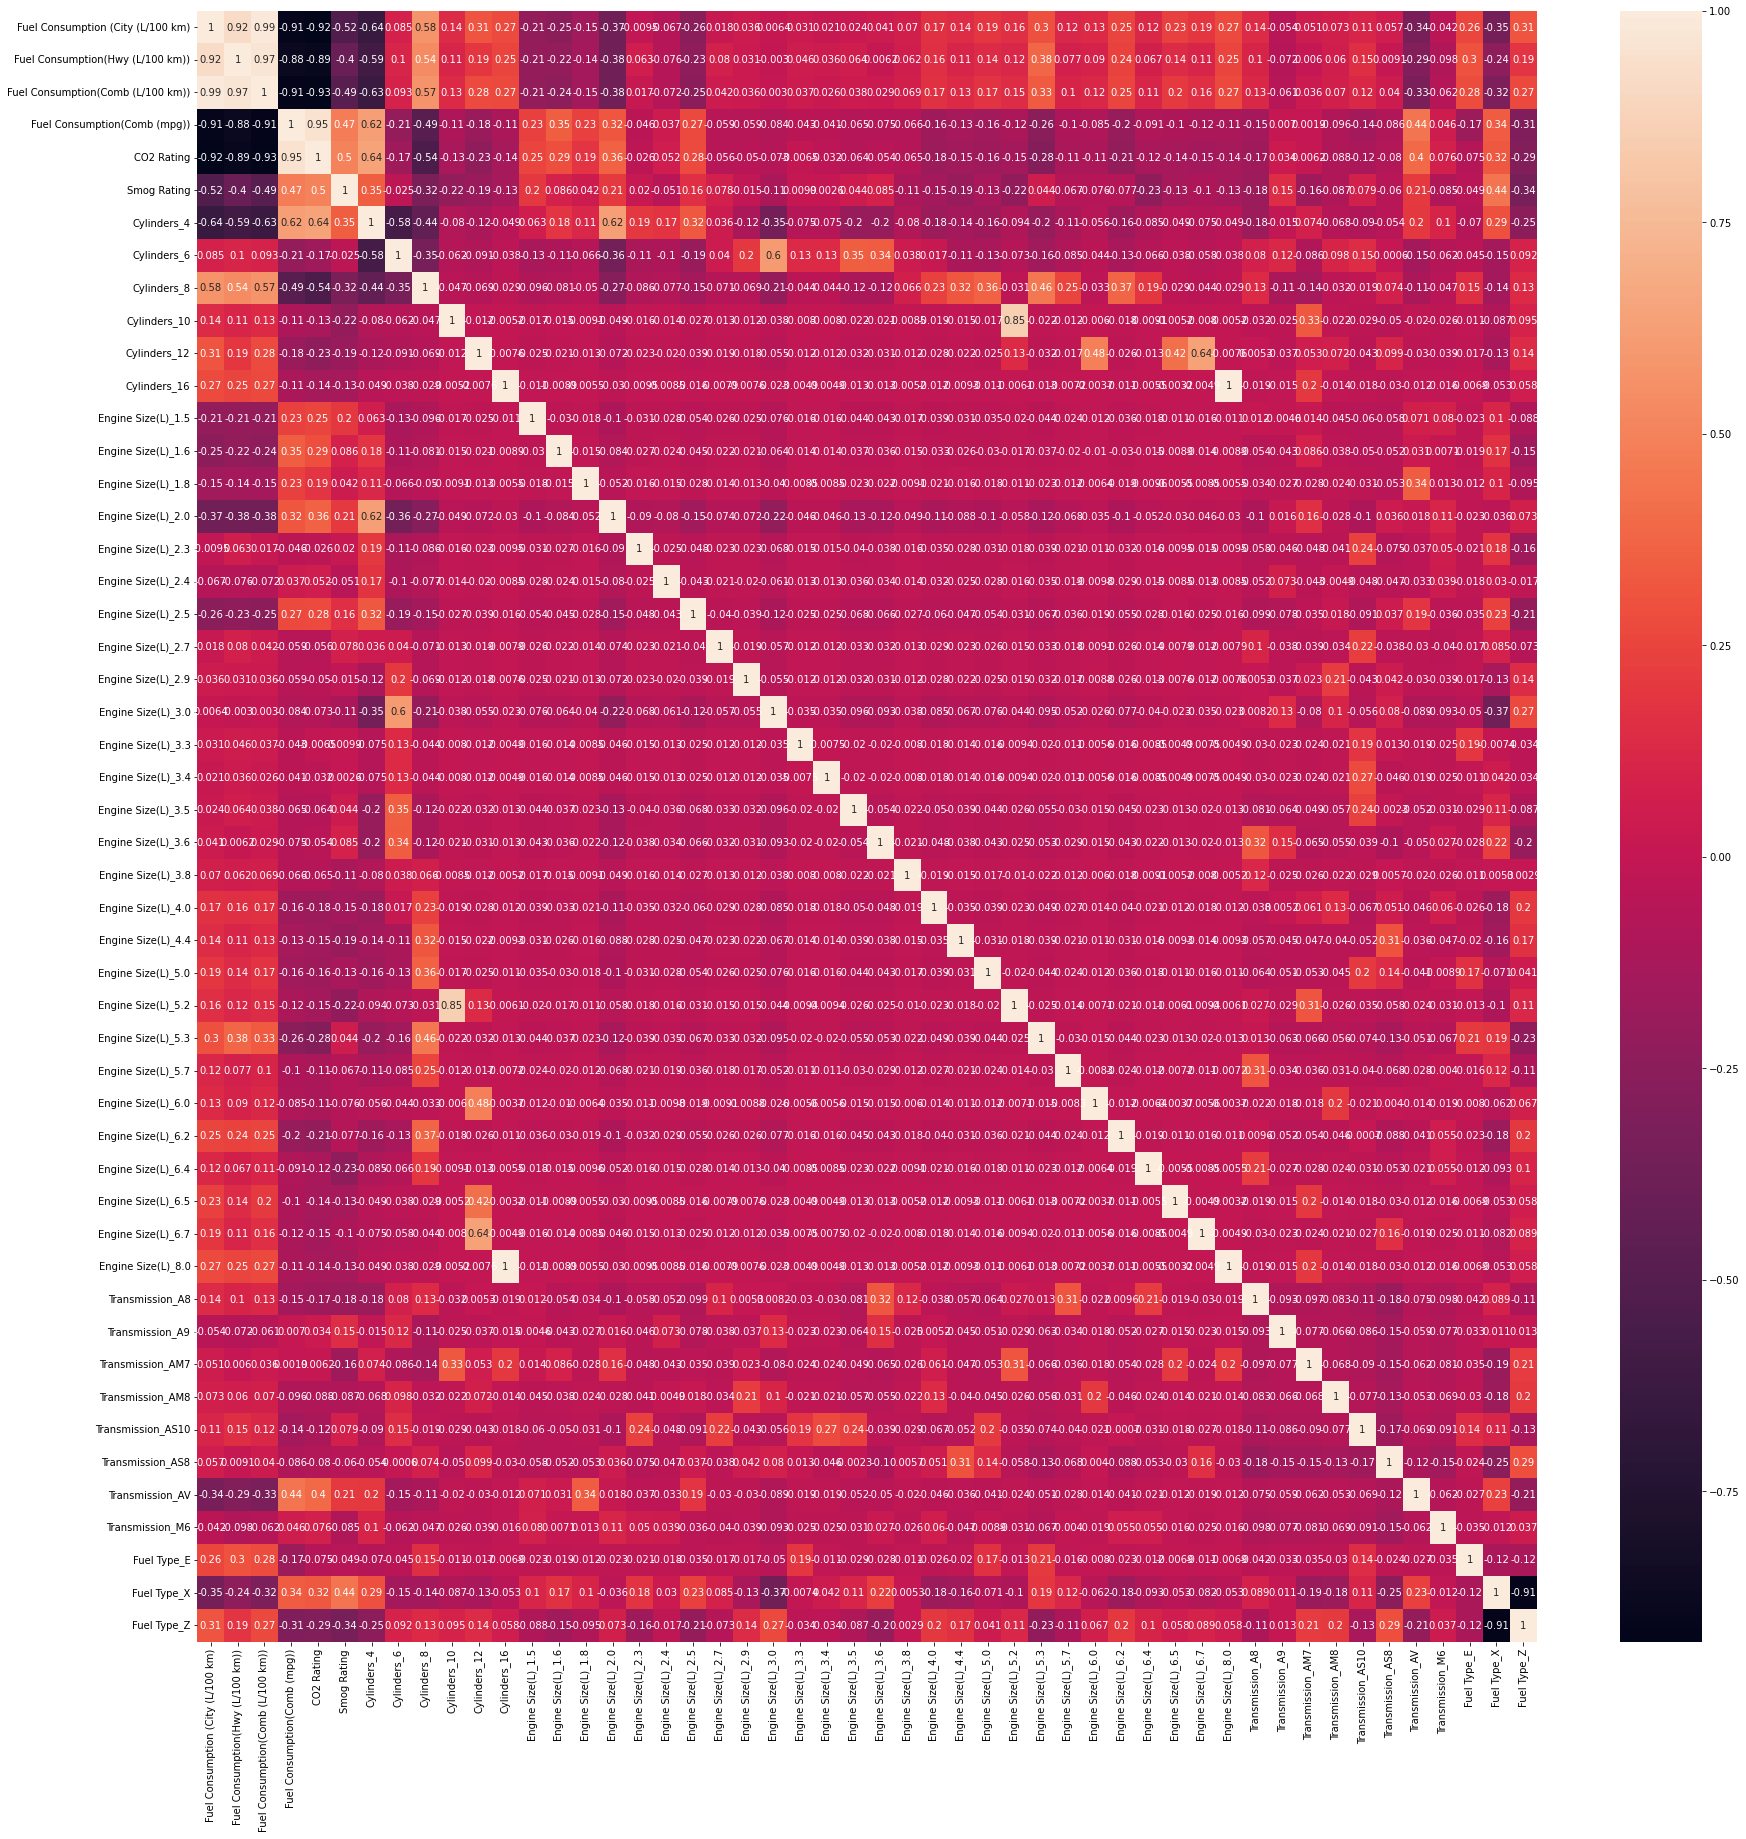

In [54]:
plt.figure(figsize=(30,30))
sn.heatmap(X[column_with_large_vif].corr(),annot=True)



In [55]:
columns_to_be_removed=['Fuel Consumption(Comb (mpg))','Fuel Type_X','Cylinders_4','Engine Size(L)_2.0']

In [56]:
X_new_featuers=list(set(X_featuers)-set(columns_to_be_removed))
X_new_featuers

['Fuel Type_Z',
 'Fuel Consumption (City (L/100 km)',
 'Cylinders_6',
 'Engine Size(L)_3.0',
 'Engine Size(L)_3.7',
 'Engine Size(L)_5.2',
 'Transmission_M6',
 'Transmission_AM7',
 'Engine Size(L)_2.9',
 'Engine Size(L)_2.5',
 'Engine Size(L)_6.0',
 'Engine Size(L)_6.5',
 'Engine Size(L)_3.8',
 'Transmission_A7',
 'Engine Size(L)_4.0',
 'Transmission_A6',
 'Engine Size(L)_5.6',
 'Engine Size(L)_1.6',
 'Engine Size(L)_2.3',
 'Engine Size(L)_5.7',
 'Engine Size(L)_6.4',
 'Transmission_AV7',
 'Engine Size(L)_1.3',
 'Transmission_AM8',
 'Cylinders_16',
 'Engine Size(L)_3.3',
 'Engine Size(L)_3.4',
 'Engine Size(L)_6.6',
 'Engine Size(L)_8.0',
 'Transmission_M7',
 'Engine Size(L)_5.0',
 'Transmission_AS8',
 'Fuel Consumption(Hwy (L/100 km))',
 'Engine Size(L)_3.6',
 'Engine Size(L)_1.8',
 'Transmission_AS5',
 'Engine Size(L)_2.7',
 'Engine Size(L)_6.7',
 'Transmission_A9',
 'Smog Rating',
 'Transmission_M5',
 'Engine Size(L)_3.5',
 'Cylinders_5',
 'Engine Size(L)_2.4',
 'Fuel Consumption(Co

In [57]:
get_vif_factors(X[X_new_featuers])

/home/orion/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,columns,VIF
0,Fuel Type_Z,5.215505
1,Fuel Consumption (City (L/100 km),39919.475541
2,Cylinders_6,70.433409
3,Engine Size(L)_3.0,34.928579
4,Engine Size(L)_3.7,2.144089
...,...,...
64,Engine Size(L)_3.2,1.793349
65,Transmission_A8,4.251141
66,Cylinders_12,32.283231
67,Transmission_AV8,1.891181


In [58]:
X_train=X_train[X_new_featuers]
lm_2=sm.OLS(y_train,X_train).fit()
lm_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                    OLS                   Adj. R-squared (uncentered):   1.000    
Dependent Variable:       CO2 Emissions(g/km)   AIC:                           3910.5394
Date:                     2022-05-08 08:25      BIC:                           4207.2269
No. Observations:         662                   Log-Likelihood:                -1889.3  
Df Model:                 66                    F-statistic:                   3.680e+04
Df Residuals:             596                   Prob (F-statistic):            0.00     
R-squared (uncentered):   1.000                 Scale:                         19.588   
----------------------------------------------------------------------------------------
                                    Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
----------------------------------------------------------------------------------------
Fuel Type_Z                         -4.4537   0.5753  -7.7409 0.0000   -5.5836   -3.3237
Fuel Consumption (City (L/100 km)    8.8797   2.6186   3.3910 0.0007    3.7369   14.0225
Cylinders_6                         -1.4761   3.0399  -0.4856 0.6274   -7.4464    4.4941
Engine Size(L)_3.0                   5.4312   3.1282   1.7362 0.0830   -0.7124   11.5749
Engine Size(L)_3.7                   1.6015   4.1120   0.3895 0.6971   -6.4743    9.6773
Engine Size(L)_5.2                   4.5245   5.8205   0.7773 0.4373   -6.9066   15.9556
Transmission_M6                    -12.3566   1.1871 -10.4094 0.0000  -14.6880  -10.0253
Transmission_AM7                   -12.1859   1.3252  -9.1954 0.0000  -14.7886   -9.5833
Engine Size(L)_2.9                   6.1512   3.3779   1.8210 0.0691   -0.4829   12.7853
Engine Size(L)_2.5                  -1.2659   0.7958  -1.5908 0.1122   -2.8288    0.2969
Engine Size(L)_6.0                   1.7028   7.4376   0.2289 0.8190  -12.9042   16.3098
Engine Size(L)_6.5                  -4.3134   7.8912  -0.5466 0.5849  -19.8114   11.1846
Engine Size(L)_3.8                  -1.1582   3.6408  -0.3181 0.7505   -8.3086    5.9923
Transmission_A7                      0.0000   0.0000   0.2130 0.8314   -0.0000    0.0000
Engine Size(L)_4.0                   2.4245   3.3741   0.7186 0.4727   -4.2021    9.0511
Transmission_A6                    -10.9881   1.5537  -7.0721 0.0000  -14.0396   -7.9366
Engine Size(L)_5.6                   8.6090   5.6881   1.5135 0.1307   -2.5622   19.7802
Engine Size(L)_1.6                  -0.7411   1.6638  -0.4454 0.6562   -4.0087    2.5265
Engine Size(L)_2.3                  -3.6229   1.3194  -2.7459 0.0062   -6.2141   -1.0316
Engine Size(L)_5.7                  -0.4585   3.8244  -0.1199 0.9046   -7.9694    7.0525
Engine Size(L)_6.4                   0.2848   4.0522   0.0703 0.9440   -7.6736    8.2431
Transmission_AV7                   -13.0102   2.0065  -6.4842 0.0000  -16.9508   -9.0696
Engine Size(L)_1.3                   2.1233   2.1185   1.0023 0.3166   -2.0374    6.2840
Transmission_AM8                   -10.8995   1.2706  -8.5779 0.0000  -13.3950   -8.4040
Cylinders_16                        -4.3322   1.7867  -2.4246 0.0156   -7.8412   -0.8231
Engine Size(L)_3.3                   7.0860   4.1534   1.7061 0.0885   -1.0711   15.2430
Engine Size(L)_3.4                  -0.2742   3.6228  -0.0757 0.9397   -7.3891    6.8407
Engine Size(L)_6.6                   3.8712   7.9799   0.4851 0.6278  -11.8009   19.5433
Engine Size(L)_8.0                  -4.3322   1.7867  -2.4246 0.0156   -7.8412   -0.8231
Transmission_M7                    -13.1496   1.6782  -7.8357 0.0000  -16.4455   -9.8538
Engine Size(L)_5.0                   1.3966   3.6152   0.3863 0.6994   -5.7035    8.4966
Transmission_AS8                   -12.0455   1.0628 -11.3332 0.0000  -14.1328   -9.9581
Fuel Consumption(Hwy (L/100 km))     8.0102   2.1729   3.6863 0.

In [59]:
coef=pd.DataFrame({'pvalue':lm_2.pvalues<0.05,'column_name':lm_2.params.index}).sort_values(by='pvalue')

In [60]:
significat_features=coef[coef['pvalue']==True]['column_name']

In [61]:
import numpy as np

X_train=X_train[significat_features]
lm_3=sm.OLS(np.sqrt(y_train),X_train).fit()
lm_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                  OLS                 Adj. R-squared (uncentered): 0.999    
Dependent Variable:     CO2 Emissions(g/km) AIC:                         905.5363 
Date:                   2022-05-08 08:25    BIC:                         1040.3943
No. Observations:       662                 Log-Likelihood:              -422.77  
Df Model:               30                  F-statistic:                 2.605e+04
Df Residuals:           632                 Prob (F-statistic):          0.00     
R-squared (uncentered): 0.999               Scale:                       0.21997  
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------
Engine Size(L)_5.3                -0.2732   0.1159  -2.3579 0.0187 -0.5007 -0.0457
Transmission_AV                   -0.8200   0.1318  -6.2193 0.0000 -1.0789 -0.5611
Transmission_AM8                   0.1376   0.1085   1.2682 0.2052 -0.0755  0.3506
Transmission_AM6                  -1.8206   0.2036  -8.9409 0.0000 -2.2204 -1.4207
Transmission_AS10                  0.0102   0.1016   0.1009 0.9197 -0.1892  0.2097
CO2 Rating                         0.7980   0.0188  42.5380 0.0000  0.7612  0.8349
Transmission_AS7                  -0.0963   0.2482  -0.3880 0.6982 -0.5837  0.3911
Transmission_AV10                 -0.5868   0.2527  -2.3222 0.0205 -1.0830 -0.0906
Transmission_AS9                   0.1659   0.1511   1.0980 0.2726 -0.1308  0.4627
Transmission_A8                    0.1067   0.0937   1.1397 0.2548 -0.0772  0.2907
Fuel Consumption (City (L/100 km)  0.5448   0.0171  31.9251 0.0000  0.5112  0.5783
Transmission_AS6                  -0.1016   0.1215  -0.8365 0.4032 -0.3402  0.1369
Transmission_M6                   -0.1270   0.1054  -1.2053 0.2285 -0.3339  0.0799
Fuel Type_E                       -5.3716   0.1780 -30.1786 0.0000 -5.7212 -5.0221
Transmission_AM7                  -0.2168   0.1072  -2.0222 0.0436 -0.4274 -0.0063
Cylinders_16                      -2.1998   0.1478 -14.8799 0.0000 -2.4901 -1.9095
Engine Size(L)_2.3                -0.0087   0.1272  -0.0686 0.9453 -0.2586  0.2411
Engine Size(L)_8.0                -2.1998   0.1478 -14.8799 0.0000 -2.4901 -1.9095
Transmission_M7                    0.0048   0.1646   0.0291 0.9768 -0.3184  0.3280
Transmission_AS8                   0.0346   0.0875   0.3955 0.6926 -0.1372  0.2064
Fuel Consumption(Hwy (L/100 km))   0.6229   0.0237  26.2650 0.0000  0.5763  0.6694
Transmission_AV6                  -0.8708   0.2147  -4.0560 0.0001 -1.2924 -0.4492
Transmission_AV8                  -0.1398   0.1484  -0.9421 0.3465 -0.4313  0.1516
Transmission_A9                    0.1358   0.1067   1.2725 0.2037 -0.0738  0.3453
Smog Rating                       -0.0176   0.0146  -1.2010 0.2302 -0.0463  0.0112
Transmission_M5                   -0.3476   0.2517  -1.3811 0.1677 -0.8419  0.1467
Transmission_AV7                  -0.4678   0.1999  -2.3399 0.0196 -0.8605 -0.0752
Transmission_AV1                  -0.5034   0.4801  -1.0485 0.2948 -1.4463  0.4394
Engine Size(L)_2.8                 2.1404   0.2794   7.6613 0.0000  1.5918  2.6890
Transmission_A6                   -0.2851   0.1565  -1.8212 0.0690 -0.5924  0.0223
Fuel Type_Z                       -0.1051   0.0497  -2.1153 0.0348 -0.2027 -0.0075
----------------------------------------------------------------------------------
Omnibus:                77.400         Durbin-Watson:            1.959            
Prob(Omnibus):          0.000          Jarque-Bera (JB):         375.151          
Skew:                   0.391          Prob(JB):                 0.000            
Kurtosis:               6.604          Condition No.:            10469949032

In [62]:
import numpy as np
y_pred=np.power(lm_3.predict(X_test[X_train.columns]),2)

In [63]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_pred,y_test))

15.528987478739761

In [64]:
np.round(metrics.r2_score(y_pred,y_test))

1.0

In [65]:
def draw_PP_plot(model,title):
  probplot=sm.ProbPlot(model.resid)
  plt.figure(figsize=(8,6))
  probplot.ppplot(line='45')
  plt.title(title)
  plt.show();

<Figure size 576x432 with 0 Axes>

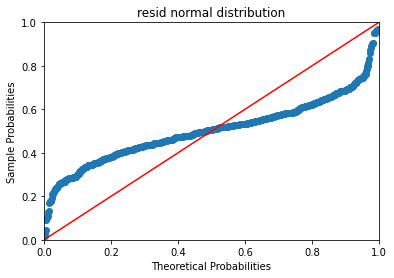

In [66]:
draw_PP_plot(lm_3,"resid normal distribution")

In [70]:
X=car_df.drop(['CO2 Emissions(g/km)'],axis=1)
y=car_df['CO2 Emissions(g/km)']

In [71]:
categorical_featuers=['Cylinders','Engine Size(L)','Transmission','Fuel Type','Model Year','Make','Vehicle Class','Model']


In [72]:
car_encoded_df=pd.get_dummies(X,columns=categorical_featuers,drop_first=True)


In [74]:
X_featuers=car_encoded_df.columns
X_featuers
y=car_df['CO2 Emissions(g/km)']

In [75]:
X_train,X_test,y_train,y_test=train_test_split(car_encoded_df[X_featuers],y,test_size=0.3,random_state=42)

In [76]:
X_train.shape

(492, 697)

In [77]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [78]:
linreg.intercept_

38.67363305680709

In [79]:
linreg.coef_

array([ 6.62784611e+00,  5.02111273e+00,  1.08379517e+01, -1.83189127e-01,
       -1.50645894e-01, -1.28199517e-01, -5.82879952e-01,  1.65291373e+00,
        2.66242523e-01,  1.84776683e+00,  1.99287498e+00, -3.12984250e-03,
        1.68085874e+00, -1.87215662e-01, -1.93579265e+00, -1.88544138e-01,
       -1.73127772e+00, -1.55122707e+00, -1.26276016e+00,  7.33785272e-01,
       -1.78102803e+00, -2.20030434e+00, -1.79305863e+00,  3.71780705e+00,
        7.35979089e+00, -2.43560337e+00, -2.08570487e-02, -5.62380989e-01,
       -5.68371805e-01, -1.80472103e+00,  3.15815548e+00,  3.20473544e+00,
        2.54812010e-01,  2.87613348e+00, -1.08505377e+00, -8.29394245e-02,
        2.05520191e+00, -3.02567212e+00,  2.35244294e+00, -2.38664761e+00,
        3.51920215e-01, -1.74852649e+00,  2.50755430e-01,  1.99534820e-01,
       -6.16911807e-01,  1.68085874e+00,  8.28134146e+00,  4.51659646e-01,
        1.57693622e+00, -1.10844658e+00,  3.26987348e+00,  2.57973996e+00,
        2.56866760e+00,  

In [82]:
list(zip(X_featuers,list(linreg.coef_)))

[('Fuel Consumption (City (L/100 km)', 6.627846109869093),
 ('Fuel Consumption(Hwy (L/100 km))', 5.021112733340148),
 ('Fuel Consumption(Comb (L/100 km))', 10.837951677817667),
 ('Fuel Consumption(Comb (mpg))', -0.1831891271037449),
 ('CO2 Rating', -0.1506458937420463),
 ('Smog Rating', -0.12819951748643277),
 ('Cylinders_4', -0.5828799520481609),
 ('Cylinders_5', 1.6529137287207618),
 ('Cylinders_6', 0.26624252314768404),
 ('Cylinders_8', 1.8477668257142916),
 ('Cylinders_10', 1.9928749788866131),
 ('Cylinders_12', -0.0031298424985174433),
 ('Cylinders_16', 1.680858738097712),
 ('Engine Size(L)_1.3', -0.18721566248254984),
 ('Engine Size(L)_1.4', -1.9357926490274893),
 ('Engine Size(L)_1.5', -0.18854413762569733),
 ('Engine Size(L)_1.6', -1.7312777237306634),
 ('Engine Size(L)_1.8', -1.5512270686919774),
 ('Engine Size(L)_2.0', -1.2627601626032297),
 ('Engine Size(L)_2.3', 0.7337852718647202),
 ('Engine Size(L)_2.4', -1.7810280273362524),
 ('Engine Size(L)_2.5', -2.200304344320692),
 

In [83]:
y_pred=linreg.predict(X_test)

In [84]:
test_pred_df=pd.DataFrame({'actual':y_test,'predicated':y_pred,'residual':y_test-y_pred})

In [85]:
test_pred_df.sample(10)

,actual,predicated,residual
867,189,187.991944,1.008056
496,299,300.850749,-1.850749
402,347,347.883722,-0.883722
579,269,273.450880,-4.450880
673,224,218.766973,5.233027
861,192,190.306035,1.693965
486,223,221.041040,1.958960
757,245,242.979596,2.020404
418,354,352.049325,1.950675
131,223,227.833715,-4.833715


In [91]:
r2=metrics.r2_score(y_test,y_pred)
r2

0.9969152220702425

In [92]:
mse=metrics.mean_squared_error(y_test,y_pred)
mse

10.14666503835252

In [94]:
from sklearn.preprocessing import StandardScaler
X_scaler=StandardScaler()
X_scaled=X_scaler.fit_transform(car_encoded_df[X_featuers])
y=(y-y.mean())/y.std()

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [115]:
linreg2=LinearRegression()
linreg2.fit(X_train,y_train)

LinearRegression()

In [116]:
linreg2.intercept_

-13631384301.88485

In [117]:
linreg2.coef_

array([ 5.08760923e-01,  2.28876551e-01,  2.79737862e-01, -7.29169873e-03,
       -2.36271840e-03,  7.40587342e-04, -2.95270334e+11,  2.27708450e+11,
       -2.76780877e+11,  4.52379245e+11,  7.74450731e+10, -1.83499385e+11,
        8.54565043e+10,  2.77990682e+10,  1.34427824e+11,  1.19062339e+11,
        1.12230361e+11,  7.09229097e+10,  2.75907191e+11, -1.94770401e+11,
        1.04885617e+11,  1.76275293e+11,  5.30147207e+10, -3.43911114e+11,
        1.23204870e+11,  4.11237323e+10,  5.19304338e+10, -1.11502668e+11,
        4.31076573e+10,  1.09844019e+11,  1.03897235e+11,  3.80961697e+10,
       -9.66682026e+10, -1.09553860e+11, -9.10090543e+10, -1.64490999e+11,
       -2.03455570e+11, -2.05478735e+11, -3.24887372e+11, -1.39747193e+11,
        2.01093254e+10, -9.88007205e+10, -4.68090696e+10, -1.22096806e+11,
       -1.22035547e+11,  6.73751194e+10, -5.38829330e+10, -2.25726412e+10,
        6.19506836e-03,  7.67530750e+10, -9.34068260e+10,  1.06735229e-02,
        6.51550293e-03,  

In [118]:
columns_coef_df=pd.DataFrame({'columns':car_encoded_df.columns,'coef':linreg2.coef_})

In [119]:
columns_coef_df.head()

,columns,coef
0,Fuel Consumption (City (L/100 km),0.508761
1,Fuel Consumption(Hwy (L/100 km)),0.228877
2,Fuel Consumption(Comb (L/100 km)),0.279738
3,Fuel Consumption(Comb (mpg)),-0.007292
4,CO2 Rating,-0.002363


In [120]:
sorted_coef_vals=columns_coef_df.sort_values('coef',ascending=False)

In [121]:
sorted_coef_vals

,columns,coef
9,Cylinders_8,4.523792e+11
235,Model_CT4-V Blackwing,4.468009e+11
209,Model_Alpina XB7,3.862308e+11
99,Make_Porsche,3.857228e+11
117,Vehicle Class_Subcompact,3.338853e+11
...,...,...
95,Make_Mazda,-4.104045e+11
76,Make_Bugatti,-4.229351e+11
62,Transmission_AV6,-4.382750e+11
233,Model_CT4-V,-5.585238e+11


###  as we can see Cylinder_8 and model CT4-V backwing are more infuncing factores in  CO2 Emission

Text(0, 0.5, 'Featuers')

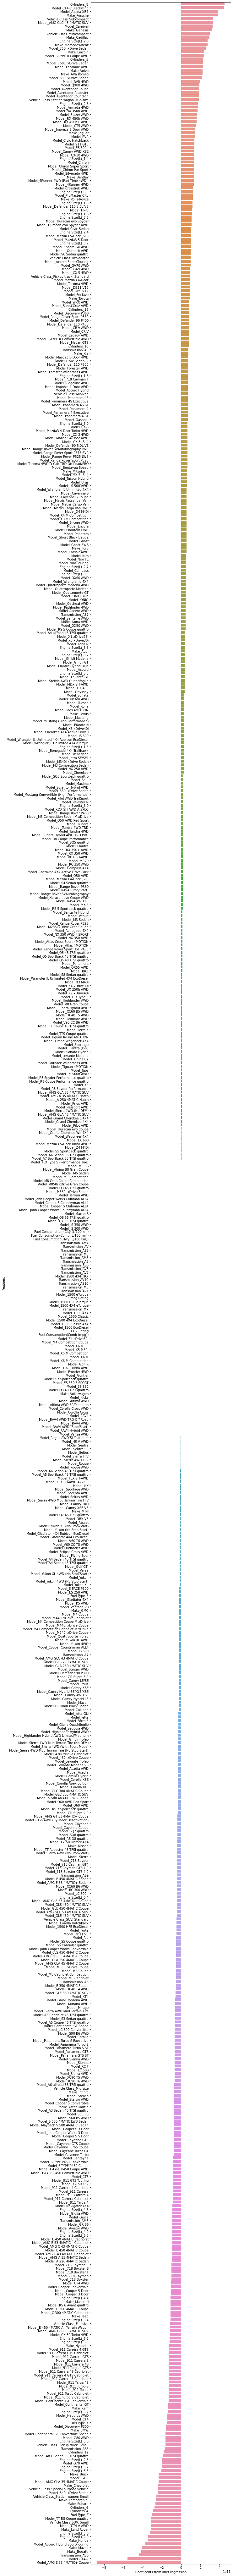

In [122]:
plt.figure(figsize=(8,150))
sn.barplot(x='coef',y='columns',data=sorted_coef_vals)
plt.xlabel('Coefficents from liner regression')
plt.ylabel('Featuers')

In [127]:
def get_train_test_rmse(model):
    y_train_pred=model.predict(X_train)
    rmse_train=round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),3)
    y_test_pred=model.predict(X_test)
    rmse_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),3)
    print("rmse_train:",rmse_train,"rmse_test:",rmse_test)

In [128]:
get_train_test_rmse(linreg2)

rmse_train: 0.009 rmse_test: 3869643824251.395


In [129]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1,max_iter=500)
ridge.fit(X_train,y_train)

Ridge(alpha=1, max_iter=500)

In [130]:
get_train_test_rmse(ridge)

rmse_train: 0.01 rmse_test: 0.097


In [131]:
ridge=Ridge(alpha=2,max_iter=500)
ridge.fit(X_train,y_train)
get_train_test_rmse(ridge)

rmse_train: 0.012 rmse_test: 0.111


In [132]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01,max_iter=500)
lasso.fit(X_train,y_train)

/home/orion/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.402e-02, tolerance: 6.029e-02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01, max_iter=500)

In [133]:
get_train_test_rmse(lasso)

rmse_train: 0.056 rmse_test: 0.079


In [135]:
lasso_coef_df=pd.DataFrame({"column":car_encoded_df.columns,'coef':lasso.coef_})

In [141]:
len(lasso_coef_df[lasso_coef_df['coef']==0]),len(X)

(675, 704)

In [138]:
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=1.01,l1_ratio=0.001,max_iter=500)
enet.fit(X_train,y_train)
get_train_test_rmse(enet)

rmse_train: 0.126 rmse_test: 0.203
